In [313]:
# Import Needed Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.graph_objects as go

In [ ]:
# Reading and Exploring the Datasets being used. 

In [330]:
covid_19 = pd.read_csv('covid.csv')
covid_confirmed = pd.read_csv('covid_confirmed.csv')

In [331]:
covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [317]:
covid19_df = pd.DataFrame(covid_19)

In [318]:
covid19_df.columns = ['Serial Number', 'Observation Date', 'State', 'Country', 'Last Updated', '# Confirmed Cases',
                     '# of Deaths', '# of Recovered']

In [319]:
covid19_df.head()

,Serial Number,Observation Date,State,Country,Last Updated,# Confirmed Cases,# of Deaths,# of Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [320]:
covid19_imp = covid19_df.loc[:,['Observation Date', 'State', 'Country','Last Updated', '# Confirmed Cases', '# of Deaths', '# of Recovered']]

In [321]:
covid19_imp.head()

,Observation Date,State,Country,Last Updated,# Confirmed Cases,# of Deaths,# of Recovered
0,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [322]:
covid19_imp.sort_values(by='Country')

,Observation Date,State,Country,Last Updated,# Confirmed Cases,# of Deaths,# of Recovered
2663,2/28/2020,NaN,Azerbaijan,2020-02-28T15:03:26,1,0,0
4674,3/10/2020,NaN,"('St. Martin',)",2020-03-10T05:33:02,2,0,0
2910,3/1/2020,NaN,Afghanistan,2020-02-24T23:33:02,1,0,0
13527,4/10/2020,NaN,Afghanistan,4/10/2020 23:01,521,15,32
10982,4/2/2020,NaN,Afghanistan,4/2/2020 8:53,273,6,10
...,...,...,...,...,...,...,...
4592,3/10/2020,NaN,occupied Palestinian territory,2020-03-10T19:13:21,25,0,0
4934,3/11/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0,0,0
5889,3/15/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0,0,0
5631,3/14/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0,0,0


In [323]:
## Determine whether there are any null values in the dataset.

result = covid19_imp.isnull().values.any()
if str(result) == 'True':
    print('There are null values.')
else: 
    print('There are no null values in the dataset.')

There are null values.


In [324]:
total_missing = covid19_imp.isnull().sum()
total_missing

Observation Date         0
State                11829
Country                  0
Last Updated             0
# Confirmed Cases        0
# of Deaths              0
# of Recovered           0
dtype: int64

In [326]:
## Determine whether there are any null values in the dataset.

result = covid_confirmed.isnull().values.any()
if str(result) == 'True':
    print('There are null values.')
else: 
    print('There are no null values in the dataset.')

There are null values.


In [327]:
missing_confirmed = covid_confirmed.isnull().sum()
missing_confirmed

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/2020           0
                 ... 
5/4/2020            0
5/5/2020            0
5/6/2020            0
5/7/2020            0
5/8/2020            0
Length: 112, dtype: int64

In [155]:
covid_confirmed = pd.DataFrame(covid_confirmed)

In [283]:
covid_confirmed = covid_confirmed.rename(columns = {'Province/State': 'State', 'Country/Region': 'Country'})

In [284]:
# Merging the confirmed cases data set with the covid-19 dataset to obtain the latitude and longitude values to display the spread
# on an animated map over the observation date. 

covid_confirmed2 = covid_confirmed[['State', 'Lat', 'Long', 'Country']]
covid_temp = covid19_imp.copy()
covid_temp['Country'].replace({'Mainland China':'China'})
covid_loc = pd.merge(covid_temp, covid_confirmed2, on=['Country', 'State'])

In [54]:
covid_loc

,Observation Date,Province/State,Country/Region,Last Updated,# Confirmed Cases,# of Deaths,# of Recovered,Lat,Long
0,1/22/2020,NaN,Japan,1/22/2020 17:00,2,0,0,36.000000,138.000000
1,1/23/2020,NaN,Japan,1/23/2020 17:00,1,0,0,36.000000,138.000000
2,1/24/2020,NaN,Japan,1/24/2020 17:00,2,0,0,36.000000,138.000000
3,1/25/2020,NaN,Japan,1/25/2020 17:00,2,0,0,36.000000,138.000000
4,1/26/2020,NaN,Japan,1/26/2020 16:00,4,0,1,36.000000,138.000000
...,...,...,...,...,...,...,...,...,...
13574,5/4/2020,NaN,Tajikistan,5/5/2020 2:32,230,3,0,38.861034,71.276093
13575,5/5/2020,NaN,Tajikistan,5/6/2020 2:32,293,5,0,38.861034,71.276093
13576,5/6/2020,NaN,Tajikistan,5/7/2020 2:32,379,8,0,38.861034,71.276093
13577,5/7/2020,NaN,Tajikistan,5/8/2020 2:32,461,12,0,38.861034,71.276093


In [55]:
covid19_imp.groupby('Country/Region')[['# Confirmed Cases', '# of Deaths', '# of Recovered']].sum()

,# Confirmed Cases,# of Deaths,# of Recovered
Country/Region,,,
Azerbaijan,1,0,0
"('St. Martin',)",2,0,0
Afghanistan,52821,1618,6155
Albania,24377,1067,12614
Algeria,112282,13278,41347
...,...,...,...
Western Sahara,190,0,80
Yemen,176,31,15
Zambia,3041,89,1512


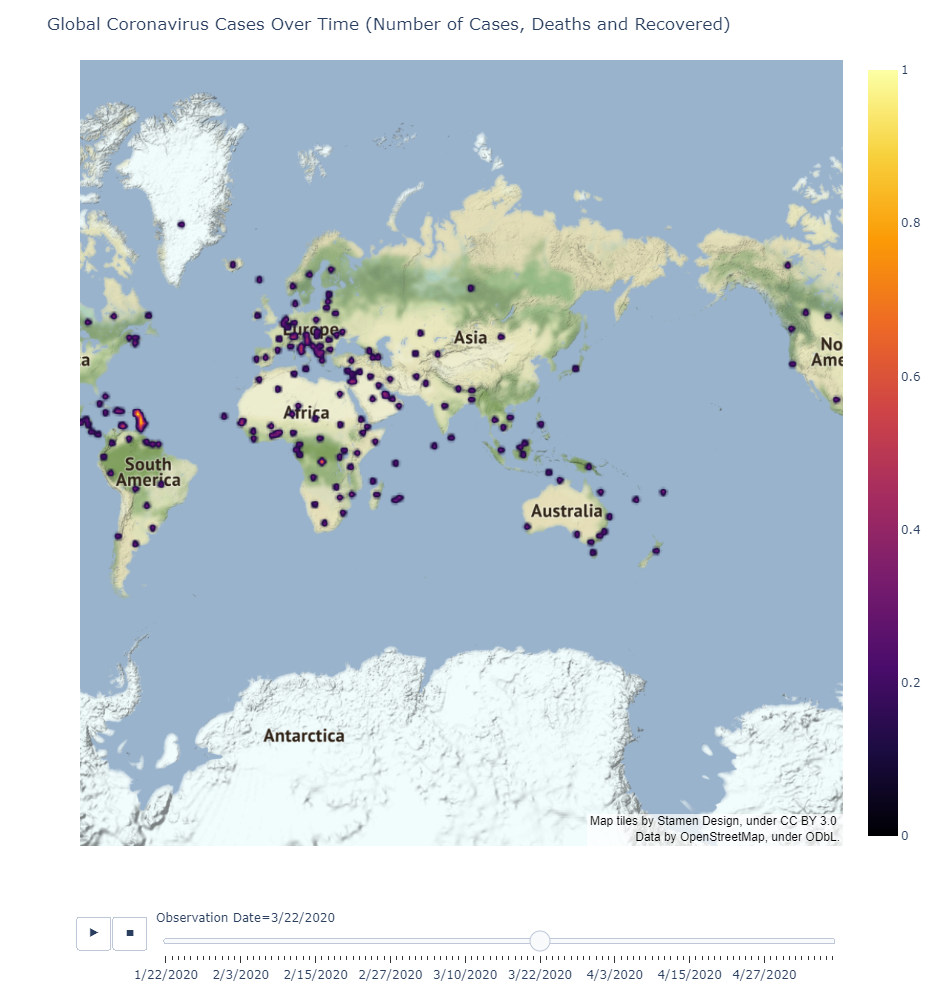

In [57]:
graph = px.density_mapbox(covid_loc, lat = 'Lat', lon='Long', hover_name = 'Country/Region',
                          hover_data = ['# Confirmed Cases', '# of Recovered', '# of Deaths'], 
                          animation_frame = 'Observation Date', color_continuous_scale = 'Inferno',
                          radius = 5, zoom =0, height = 1000, mapbox_style= 'stamen-terrain')

graph.update_layout(title='Global Coronavirus Cases Over Time (Number of Cases, Deaths and Recovered)')

graph.show()

In [78]:
covid_confirmed_imp = covid_confirmed[['Country/Region', '5/8/2020']]
covid_confirmed_imp.columns = ['Country/Region', 'Latest Confirmed Cases']
covid_confirmed_imp

,Country/Region,Latest Confirmed Cases
0,Afghanistan,3778
1,Albania,850
2,Algeria,5369
3,Andorra,752
4,Angola,43
...,...,...
261,Western Sahara,6
262,Sao Tome and Principe,208
263,Yemen,34
264,Comoros,8


In [84]:
covid_confirmed_imp = covid_confirmed_imp.sort_values(by='Latest Confirmed Cases', ascending = False)

In [86]:
covid_confirmed_imp.head(5)

,Country/Region,Latest Confirmed Cases
225,US,1283929
201,Spain,222857
137,Italy,217185
223,United Kingdom,211364
187,Russia,187859


In [98]:
covid_top = covid_confirmed[['Country/Region', 'Province/State', '5/8/2020']]
covid_top.columns = ['Country', 'Province/State', 'Latest Confirmed Cases']
covid_top

,Country,Province/State,Latest Confirmed Cases
0,Afghanistan,NaN,3778
1,Albania,NaN,850
2,Algeria,NaN,5369
3,Andorra,NaN,752
4,Angola,NaN,43
...,...,...,...
261,Western Sahara,NaN,6
262,Sao Tome and Principe,NaN,208
263,Yemen,NaN,34
264,Comoros,NaN,8


In [160]:
# Obtain the latest confirmed cases for the United States

covid_19_US = covid19_imp[(covid19_imp['Country'] == "US") & (covid19_imp['Observation Date'] == "5/8/2020" )]

In [163]:
covid_19_US.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess cruise ship', 'District of Columbia', 'Florida',
       'Georgia', 'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Recovered', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [289]:
# Read and explore the ICU Dataset

icu_us = pd.read_csv('ICU_US.csv')

In [290]:
icu_us = pd.DataFrame(icu_us)

In [215]:
icu_us.head()

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
0,Alabama,Autauga,6,55036,10523,19.1,1754.0
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0
2,Alabama,Barbour,5,26201,6150,23.5,1230.0
3,Alabama,Bibb,0,22580,4773,21.1,NaN
4,Alabama,Blount,6,57667,13600,23.6,2267.0


In [296]:
result = icu_us.isnull().values.any()
if str(result) == 'True':
    print('There are null values.')
else: 
    print('There are no null values in the dataset.')

There are null values.


In [297]:
missing = icu_us.isnull().sum()
missing

State                                     0
County                                    0
ICU Beds                                  0
Total Population                          0
Population Aged 60+                       0
Percent of Population Aged 60+            0
Residents Aged 60+ Per Each ICU Bed    1666
dtype: int64

In [238]:
icu_usnew = icu_us.groupby("State")[['ICU Beds', 'Total Population']].sum()

In [291]:
icu_usnew.head(10)

,ICU Beds,Total Population
State,,
Alabama,1533,4850771
Alaska,119,738565
Arizona,1559,6809946
Arkansas,732,2977944
California,7338,38982847
Colorado,1597,5436519
Connecticut,674,3594478
Delaware,186,943732
District of Columbia,314,672391


In [292]:
states_icu = icu_us.State.unique()

In [217]:
important = covid_19_US.loc[:,['State', '# Confirmed Cases']]

In [218]:
states_case = important.State.unique()

In [222]:
np.setdiff1d(states_case, states_icu)

array(['Diamond Princess cruise ship', 'Grand Princess', 'Guam',
       'Northern Mariana Islands', 'Puerto Rico', 'Recovered',
       'Virgin Islands'], dtype=object)

In [233]:
# Remove specific states in the confirmed cases dataset which are not present in the ICU beds dataset. 

covid_19_USnew = covid_19_US[(covid_19_US.State != 'Diamond Princess cruise ship') & (covid_19_US.State != 'Grand Princess') &
(covid_19_US.State != 'Guam') & (covid_19_US.State != 'Northern Mariana Islands') & (covid_19_US.State != 'Puerto Rico')
            & (covid_19_US.State != 'Recovered') & (covid_19_US.State != 'Virgin Islands')]

In [245]:
covid_19_update = covid_19_USnew.loc[:, ['State', '# Confirmed Cases']]

In [365]:
# Merge the two datasets. 

essential = pd.merge(icu_usnew, covid_19_update, on = ["State"])
x = essential.State
y1 = essential['ICU Beds']
y2 = essential['# Confirmed Cases']

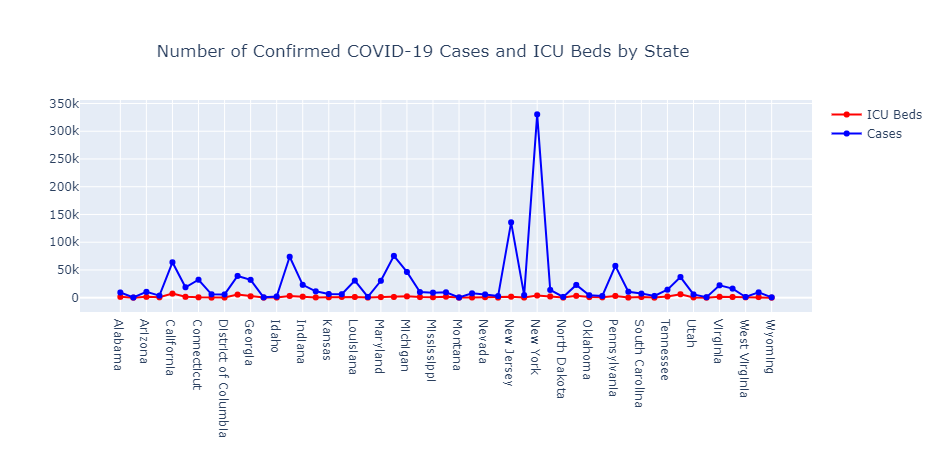

In [366]:
graph = go.Figure()
graph.add_trace(go.Scatter(x= x,y=y1, mode ='lines+markers', name = 'ICU Beds', line = dict(color = 'red', width=2)))
graph.add_trace(go.Scatter(x= x,y=y2, mode ='lines+markers', name = 'Cases', line = dict(color = 'blue', width=2)))

graph.update_yaxes(tick0=0, dtick=50_000)
graph.update_layout(title= {'text':"Number of Confirmed COVID-19 Cases and ICU Beds by State", 'y':0.9, 'x':0.45,
                            'xanchor': 'center', 'yanchor': 'top'})

graph.show()

In [367]:
essential['Difference in Number of Cases and ICU Beds'] = essential.apply(lambda row: abs(row['ICU Beds']- row['# Confirmed Cases']), axis =1)

In [368]:
essential = essential.sort_values(by=['Difference in Number of Cases and ICU Beds'], ascending = False)

In [369]:
essential 

,State,ICU Beds,Total Population,# Confirmed Cases,Difference in Number of Cases and ICU Beds
32,New York,3952,19798228,330407,326455
30,New Jersey,1822,8960161,135840,134018
21,Massachusetts,1326,6789319,75333,74007
13,Illinois,3144,12854526,73760,70616
4,California,7338,38982847,63779,56441
38,Pennsylvania,3169,12790505,57371,54202
22,Michigan,2423,9925568,46386,43963
9,Florida,5604,20278447,39199,33595
6,Connecticut,674,3594478,32411,31737
43,Texas,6199,27419612,37246,31047
